# Deliveroo Database Analysis: Market Insight for Restaurant Business

#### From a dataset from Kaggle, data wrangling and structuring was performed using Python to follow to the creation of a database on MySQL Workbench.
Using this software, it was possible to export tables as csv files and create these graphics to better understand and visualize data.

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(style="darkgrid")

To define which product our restaurant business could focus on, we analyzed on MySQL Bench the variation of prices for the 242 products identified in the orders table on MySQL.

In [7]:
path = "/Users/laurasuemitsu/Desktop/DATA_FT_May_2025/Week 4/Mini project/prod_price_analysis.csv"

prod_profit = pd.read_csv(path)

Since the large values of rows difficults the visualization on the graphic, the 30 products with highest unit prices were selected from the dataframe using the code below:

In [8]:
prod_profit_largest = prod_profit.nlargest(30, 'max_unit_price')

Then the resulting dataframe was plotted as a scatter plot with the code described below:

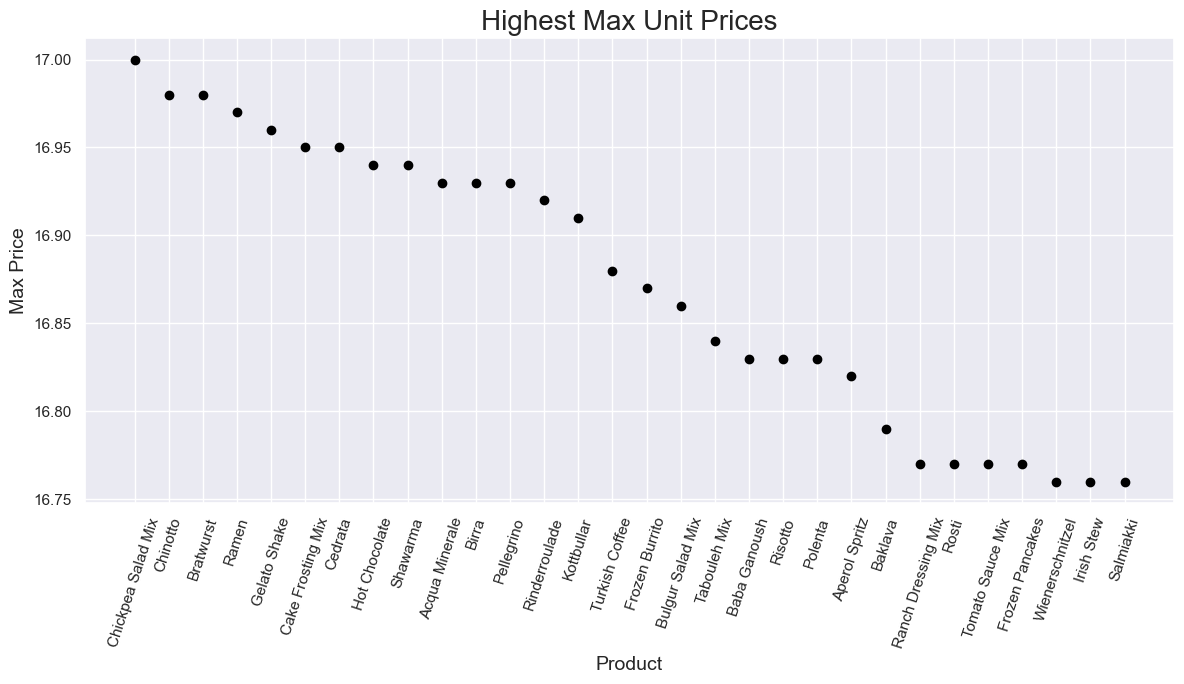

In [9]:
plt.figure(figsize=(12, 7))
plt.scatter(prod_profit_largest['product'], prod_profit_largest['max_unit_price'], color='black')
plt.xlabel('Product', size= 14)
plt.ylabel('Max Price', size=14)
plt.title('Highest Max Unit Prices', size = 20)
plt.xticks(rotation=72)
plt.tight_layout()
plt.show()

The same process was executed again to identify the 30 products with the lowest unit price:

In [10]:
prod_profit_smallest = prod_profit.nsmallest(30, 'max_unit_price')

Then the resulting dataframe was also plotted as a scatter plot:

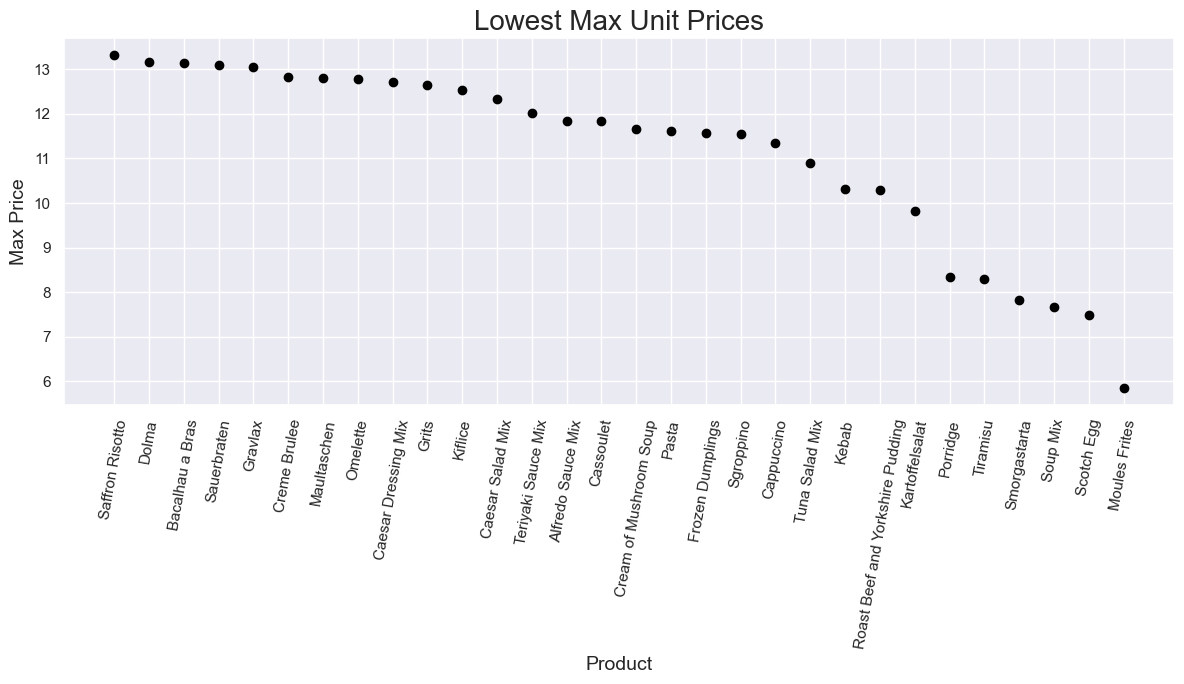

In [11]:
plt.figure(figsize=(12, 7))
plt.scatter(prod_profit_smallest['product'], prod_profit_smallest['max_unit_price'], color='black')
plt.gca().invert_xaxis()
plt.xlabel('Product', size= 14)
plt.ylabel('Max Price', size=14)
plt.title('Lowest Max Unit Prices', size = 20)
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

#### Most expensive products: 
The most expensive products were: chickpea salad mix, bratwurst, ramen, shawarma, bulgur salad mix, tabouleh mix. This means that healthy products and international cuisine have a high added value, so they can be interesting categories for this business investment, if we decide to focus on a high class client as our customer persona.

#### Cheapest products:
Moules frites, soup mix, kartoffelsalat, roast beef, kebab and tuna salad mix are the cheapest products of the dataset. These could be good options for our activity if we decide to focus on a lower class client as our customer persona.


Another approach that we used to analyse the possible product to work with was according to the amount of orders.

In [15]:
path_ = "/Users/laurasuemitsu/Desktop/DATA_FT_May_2025/Week 4/Mini project/prod_orders_analysis.csv"


The dataframe created below was then sorted to show the 30 products with the highest amount of orders.

In [16]:
prod_orders = pd.read_csv(path_)
prod_orders.head(3)
prod_orders_sorted_rows = prod_orders.sort_values('n_orders', ascending=False)
prod_orders_sorted_rows.head(30)

,prod_id,product,n_orders
184,prod_47,Cedrata,182
234,prod_92,Gelato Shake,121
32,prod_128,Limoncino,113
215,prod_75,Fernet-Branca,105
118,prod_205,Sanbitter,104
29,prod_125,Limonata,102
117,prod_204,Sambuca,101
206,prod_67,Cynar,100
236,prod_94,Gin Tonic,99
212,prod_72,Extra Dry,99


In [17]:
prod_orders_sample = prod_orders.nlargest(30, 'n_orders')

Then the resulted dataframe was plotted as a bar plot according to the cell codes below:

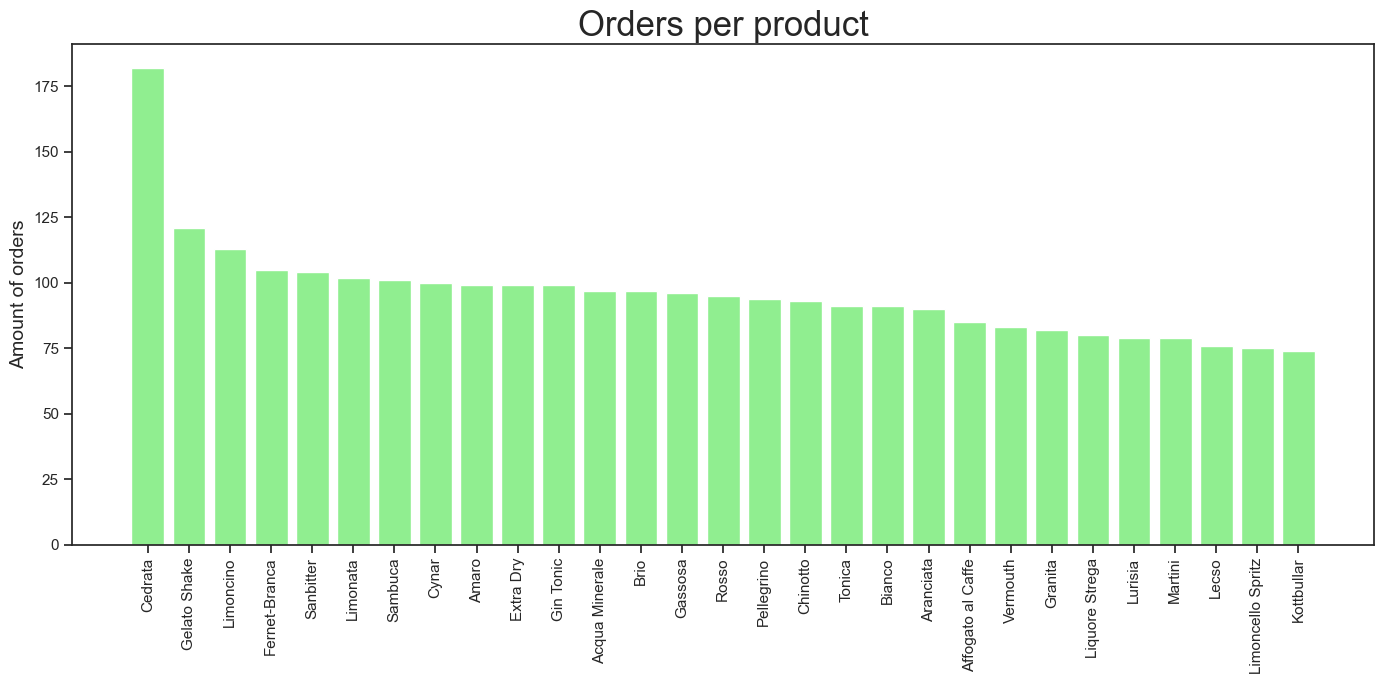

In [18]:
sns.set_theme(style="ticks")
product = prod_orders_sample['product']
orders = prod_orders_sample['n_orders']
plt.figure(figsize=(14, 7))
plt.bar(product, orders, color = "lightgreen")
plt.ylabel('Amount of orders', size = 14)
plt.title('Orders per product', size = 25)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed (useful for many products)
plt.tight_layout()  # Adjust spacing to prevent clipping
plt.show()

After some research, it was possible to conclude that the great majority of products with highest orders were beverages and not food items.
So it would be more interesting to use the previous approach than this second one to select our product.

Then to select the location of our business, we analysed the location that had the highest revenue of orders and plot a barplot:

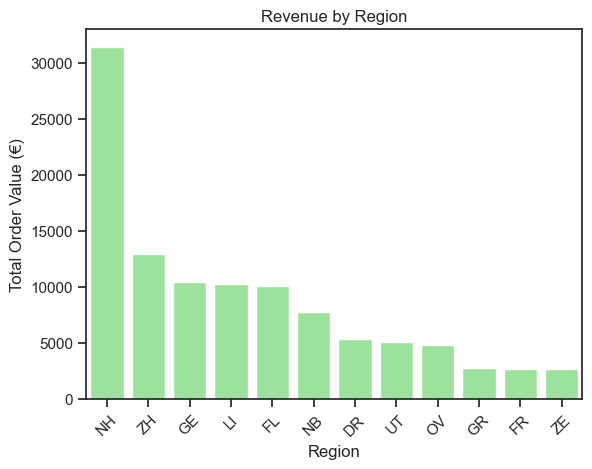

In [19]:
df_csv = "/Users/laurasuemitsu/Desktop/DATA_FT_May_2025/final_df.csv"
final_df = pd.read_csv(df_csv)

orders_by_state = final_df.groupby("state_code").agg(
    total_orders=("price_in_euro", "count"),
    total_revenue=("price_in_euro", "sum")
).reset_index()


orders_by_state = orders_by_state.sort_values(by="total_revenue", ascending=False)


sns.barplot(x="state_code", y="total_revenue", data=orders_by_state, color="lightgreen",
            order=orders_by_state["state_code"])  

plt.title("Revenue by Region")
plt.ylabel("Total Order Value (€)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()

The region with the highest total order value in Euros was NH that stands for North Holland, which is the region where Amsterdam is located.

So this would be the most lucrative region where to install and focus the orders of our business.


Finally, to study and analyse the clients ordering food and beverages on this food delivery platform, we used mainly My SQL Workbench to access the data.

We used the following queries on this software to understand the ration of subscription types per client, the clients distribution regarding gender and the total spent for each gender and subscription type group of clients.

In [20]:
# SELECT
#     u.customer_subscription,
#     p.product,
#     COUNT(*) AS order_count
# FROM orders o
# JOIN user u ON o.customer_id = u.customer_id
# JOIN product p ON o.meal_name = p.product
# GROUP BY u.customer_subscription, p.product
# ORDER BY order_count DESC;

# SELECT
#     u.gender,
#     u.customer_subscription,
#     COUNT(*) AS total_orders,
#    ROUND(SUM(p.product_price * o.total_quantity), 2) AS total_spent
# FROM orders o
# JOIN user u ON o.customer_id = u.customer_id
# JOIN product p ON o.meal_name = p.product
# GROUP BY u.gender, u.customer_subscription
# ORDER BY total_spent DESC;

# SELECT
#     gender,
#     ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM user), 1) AS percentage
# FROM user
# GROUP BY gender;

We had a mostly even customer gender distribution with 50.6% of female clients and 49.4% of male clients.

Basic female users made the most orders and spent the most overall. But total spending is similar across all groups, so we think targeted offers could help boost loyalty.

Cedrata is the top-performing product for both Basic and Premium users. Premium customers show strong interest in Lecso and Gelato Shake.

## Summary:

* Location - Our analysis showed that the highest number of orders came from Noord-Holland (NH). This makes it the most strategic location for launching our restaurant.

* Product - The most ordered products are beverages, both alcoholic and soft drinks and not food items. So an interesting approach to define our product, since we want to work with food mostly, would be to decide between a high added value and more expensive product, like healthy foods and international cuisine, or a lower price product like moules frites or kebab.

* Client (persona) - Our core customers are female users, who place the most orders and generate the highest revenue. They enjoy Italian drinks and desserts as well as Balkan-style food. However, spending is balanced across all groups - meaning the restaurant could appeal to a wide range of customers with the right promotions. 